*Remember that you can execute the code cells (the ones that have "In" written on their left side) by pressing Shift + Enter!*

As always, we start this notebook with the following line that allows to easily access SciPy functions:

In [6]:
%pylab inline
import matplotlib as plt

Populating the interactive namespace from numpy and matplotlib


# Harmonic Oscillator

We will start with the a single particle in a harmonic potential, which is given by a potential function
$$
U(x) = \frac{1}{2} k x^2 .
$$
Here $k$ is a parameter that determines the width of the potential. In Molecular Dynamics we need to calculate the force that arises from changes in this potential:
$$
F(x) = - \frac{\mathrm{d}U}{\mathrm{d}x} = - k x
$$

We start by defining two python functions, U and F, that calculate the potential energy and the force for a given value of x:

In [2]:
def U(x): return 0.5*k*x**2
def F(x): return -k*x

To do any numerical work, we will have to specify both the spring constant k as well as the mass m of the particle. We will keep things simple, and set both of them equal to one:

In [3]:
m = 1.0
k = 1.0

Let's take a look at the potential:

Text(0, 0.5, 'U(x)')

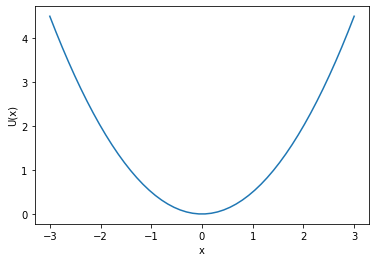

In [4]:
x = linspace(-3,3)
plot (x, U(x))
xlabel("x")
ylabel("U(x)")

Finally, we have to specify the initial condition for our dynamics: at time t=0, we specify the initial positon x0 and the initial velocity v0:

In [5]:
x0 = 1.0
v0 = 0.0

### Exact solution

For the harmonic oscillator we can calculate the exact solution of Newton's second law. Assuming that the initial velocity v0 is zero, the solution is
$$
x(t) = x_0 \cos(\omega t)
$$
where $\omega = \sqrt{k/m}$. By taking one time derivative we also obtain the exact solution for the velocity as a function of time:
$$
v(t) = - x_0 \omega \sin(\omega t) .
$$

Let's code this up in python and see what the solution looks like:

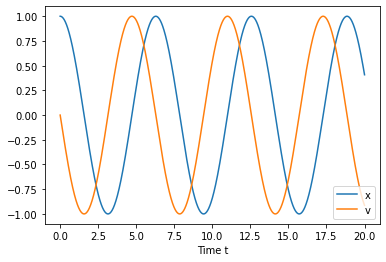

In [7]:
omega = sqrt(k/m)
t = linspace(0,20,2000)
x = x0*cos(omega*t)
v = -x0*omega*sin(omega*t)
plot (t, x, label="x")
plot (t, v, label="v")
xlabel("Time t")
legend(loc="lower right")

We see the familiar oscillatory motion of the particle in a harmonic potential.

We can also monitor the potential and kinetic energy as a function of time, as well as the sum of the two (which is the total energy of the system):

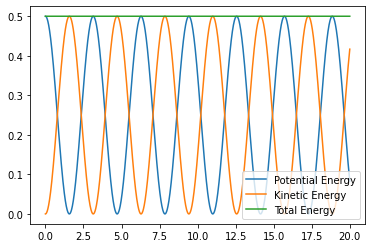

In [8]:
Epot = U(x)
Ekin = 0.5*m*v**2
plot(t, Epot, label="Potential Energy")
plot(t, Ekin, label="Kinetic Energy")
plot(t, Epot+Ekin, label="Total Energy")
legend(loc="lower right")

We see that both kinetic and potential energy oscillate, but their sum is constant. This is a nice example of energy conservation that is a consequence of Newton's law: energy can flow back and forth between potential and kinetic energy, but the total energy never changes.

By the way, since we already calculate the trajectory x(t), we can calculate the probability distribution of the particle position by simply making a (normalized histogram):

Text(0, 0.5, 'Probability Density p(x)')

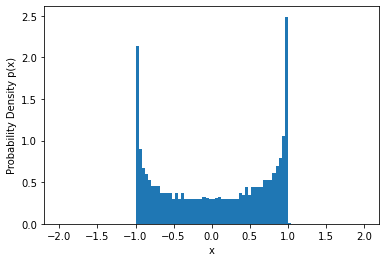

In [9]:
hist(x,density=True,range=(-2*x0,2*x0),bins=100);
xlabel("x")
ylabel("Probability Density p(x)")

This is the distribution you spent so much effort to obtain on Homework 1!

### A simple Euler algorithm

Now let's look at how to solve Newton's second law numerically. The simplest approach is the Euler algorithm, which is basically a simple truncation of the Taylor expansion of x(t):
$$
x(t+\Delta t) = x(t) + v(t) \Delta t + \frac{1}{2} \frac{F(t)}{m} (\Delta t)^2 \\
v(t+\Delta t) = v(t) + \frac{F(t)}{m} \Delta t
$$

To do this in practice, we have to specify the timestep $\Delta t$, and have to specify how many steps (Nsteps) we want to take. The code for that looks as follows, where cur_x, cur_v and cur_t are the current position, velocity, and time:

In [10]:
dt = 0.01
Nsteps = 2000
cur_x = x0
cur_v = v0
cur_t = 0.
for i in range(Nsteps):
    cur_x += cur_v*dt + 0.5*F(cur_x)/m*dt**2
    cur_v += F(cur_x)/m*dt
    cur_t += dt

That works, but we still need a way to save the data as we are calculating it. Here is the same code again, but this time we reserve arrays to store all the values for x, v and t as we go along:

In [11]:
dt = 0.01
Nsteps = 2000
x = zeros(Nsteps)
v = zeros(Nsteps)
t = zeros(Nsteps)
cur_x = x0
cur_v = v0
cur_t = 0.
for i in range(Nsteps):
    x[i] = cur_x
    v[i] = cur_v
    t[i] = cur_t
    cur_x += cur_v*dt + 0.5*F(cur_x)/m*dt**2
    cur_v += F(cur_x)/m*dt
    cur_t += dt

Alright -- let's look at the result:

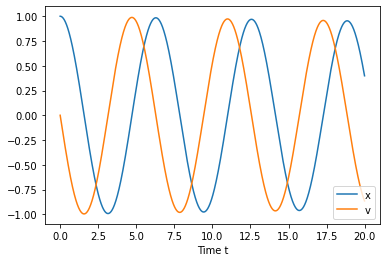

In [14]:
plot (t, x, label="x")
plot (t, v, label="v")
xlabel("Time t")
legend(loc="lower right")
savefig("trial.png")

That looks pretty good! We see the same oscillations in both position and velocity as we did earlier in the exact analytical solution. However, the amplitude of these oscillations seems to decrease slightly over time!?! Let's look at the energies:

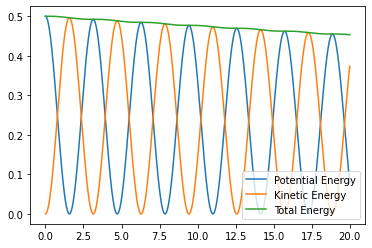

In [13]:
Epot = U(x)
Ekin = 0.5*m*v**2
plot(t, Epot, label="Potential Energy")
plot(t, Ekin, label="Kinetic Energy")
plot(t, Epot+Ekin, label="Total Energy")
legend(loc="lower right")

We see that the total energy indeed decreases over time -- the simple Euler algorithm does not do a good job at conserving energy.

### Velocity Verlet algorithm

Let's implement the Velocity Verlet algorithm, which is claimed to be more accurate than the simple Euler method. Here is the code -- you should compare it to the one above and spot the differences!

The current verlet algorithm:

$v(t + \delta t) = v(t) + \frac{1}{2}\frac{F(r(t))}{m}\delta t$

In [15]:
dt = 0.01
Nsteps = 2000
x = zeros(Nsteps)
v = zeros(Nsteps)
t = zeros(Nsteps)
cur_x = x0
cur_v = v0
cur_t = 0.
for i in range(Nsteps):
    x[i] = cur_x
    v[i] = cur_v
    t[i] = cur_t
    cur_v += 0.5*F(cur_x)/m*dt
    cur_x += cur_v*dt
    cur_v += 0.5*F(cur_x)/m*dt
    cur_t += dt

Here the trajectory, as calculated by the Velocity Verlet algorithm:

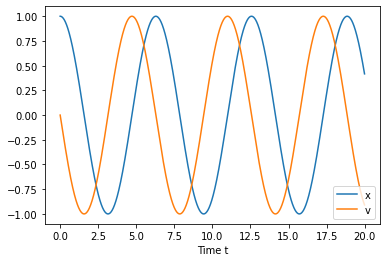

In [16]:
plot (t, x, label="x")
plot (t, v, label="v")
xlabel("Time t")
legend(loc="lower right")

That look smuch better -- it's indistinguishable from the exact solution! Let's look at the energies:

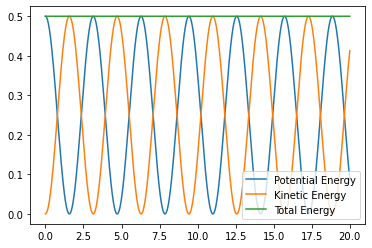

In [17]:
Epot = U(x)
Ekin = 0.5*m*v**2
plot(t, Epot, label="Potential Energy")
plot(t, Ekin, label="Kinetic Energy")
plot(t, Epot+Ekin, label="Total Energy")
legend(loc="lower right")

We see that energy is indeed conserved rather well by the Velocity Verlet algorithm.

# Other Potentials

In the harmonic oscillator example above we could solve Newton's second law either analytically or numerically. But for almost all potential functions an analytical solution does not exist, and a numerical approach is the only option. Fortunately, we don't have to change anything in algorithm itself -- all we need to do is to tell it what the force should be!

Let's explore this by an example: we specify a new, and slightly more complicated potential function $V(x)$, and the corresponding force $F(x) = - \mathrm{d}V/\mathrm{d}x$:

In [18]:
def U(x): return 0.5*k*x**2 + 0.25*r*x**4
def F(x): return -k*x - r*x**3

This potential has two parameters, $k$ and $r$, which we choose to be

In [19]:
k = -1.0
r = 1.0

Let's take a look at this potential:

Text(0, 0.5, 'U(x)')

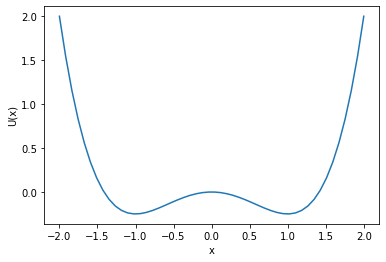

In [20]:
x = linspace(-2,2)
plot (x, U(x))
xlabel("x")
ylabel("U(x)")

We see that this potential has two minima that are separated by a maximum.

Let's choose an initial position and velocity...

In [21]:
x0 = 0.
v0 = 0.5

...and let's run the same Velocity Verlet algorithm as above!

In [22]:
dt = 0.01
Nsteps = 2000
x = zeros(Nsteps)
v = zeros(Nsteps)
t = zeros(Nsteps)
cur_x = x0
cur_v = v0
cur_t = 0.
for i in range(Nsteps):
    x[i] = cur_x
    v[i] = cur_v
    t[i] = cur_t
    cur_v += 0.5*F(cur_x)/m*dt
    cur_x += cur_v*dt
    cur_v += 0.5*F(cur_x)/m*dt
    cur_t += dt

Let's look at the resulting trajectory:

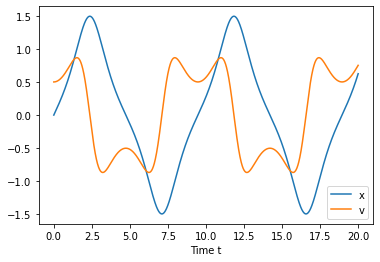

In [23]:
plot (t, x, label="x")
plot (t, v, label="v")
xlabel("Time t")
legend(loc="lower right")

Oh my -- this looks complicated! You can perhaps imagine that obtaining this result through an analytical solution would be very difficuly. Can you make sense of all the ups and downs in x and v?

Even though position and velocity seem to change in erratic ways, we do know that total energy should be conserved. Is it? Let's take a look:

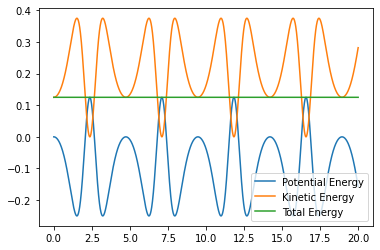

In [24]:
Epot = U(x)
Ekin = 0.5*m*v**2
plot(t, Epot, label="Potential Energy")
plot(t, Ekin, label="Kinetic Energy")
plot(t, Epot+Ekin, label="Total Energy")
legend(loc="lower right")

Indeed it is!

# Question 4

In [25]:
def U(x): return 1-cos(x)
def F(x): return -sin(x)

This potential has two parameters, $k$ and $r$, which we choose to be

In [26]:
k = -1.0
r = 1.0

Let's take a look at this potential:

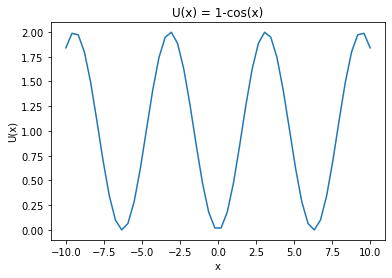

In [111]:
x = linspace(-10,10)
plot (x, U(x))
xlabel("x")
ylabel("U(x)")
title("U(x) = 1-cos(x)")
savefig("4c_potential.png")

We see that this potential has two minima that are separated by a maximum.

## Using initial conditions x = 0 and v = 1

In [45]:
x0 = 0.
v0 = 1.

...and let's run the same Velocity Verlet algorithm as above!

In [46]:
dt = 0.01
Nsteps = 2000
x = zeros(Nsteps)
v = zeros(Nsteps)
t = zeros(Nsteps)
cur_x = x0
cur_v = v0
cur_t = 0.
for i in range(Nsteps):
    x[i] = cur_x
    v[i] = cur_v
    t[i] = cur_t
    cur_v += 0.5*F(cur_x)/m*dt
    cur_x += cur_v*dt
    cur_v += 0.5*F(cur_x)/m*dt
    cur_t += dt

Let's look at the resulting trajectory:

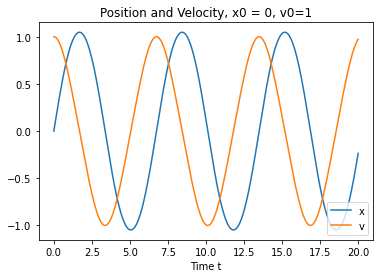

In [47]:
plot (t, x, label="x")
plot (t, v, label="v")
xlabel("Time t")
legend(loc="lower right")
title("Position and Velocity, x0 = 0, v0=1")
savefig("4b_pos_vel.png")

Oh my -- this looks complicated! You can perhaps imagine that obtaining this result through an analytical solution would be very difficuly. Can you make sense of all the ups and downs in x and v?

Even though position and velocity seem to change in erratic ways, we do know that total energy should be conserved. Is it? Let's take a look:

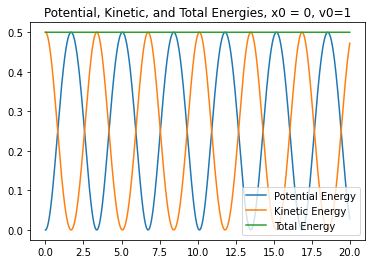

In [48]:
Epot = U(x)
Ekin = 0.5*m*v**2
plot(t, Epot, label="Potential Energy")
plot(t, Ekin, label="Kinetic Energy")
plot(t, Epot+Ekin, label="Total Energy")
legend(loc="lower right")
title("Potential, Kinetic, and Total Energies, x0 = 0, v0=1")
savefig("4b_energy.png")

Indeed it is!

## Using intitial condtions x = 0 and v = 2.1

In [106]:
x0 = 0.
v0 = 2.1

...and let's run the same Velocity Verlet algorithm as above!

In [107]:
dt = 0.0001
Nsteps = 200000
x = zeros(Nsteps)
v = zeros(Nsteps)
t = zeros(Nsteps)
cur_x = x0
cur_v = v0
cur_t = 0.
for i in range(Nsteps):
    x[i] = cur_x
    v[i] = cur_v
    t[i] = cur_t
    cur_v += 0.5*F(cur_x)/m*dt
    cur_x += cur_v*dt
    cur_v += 0.5*F(cur_x)/m*dt
    cur_t += dt

Let's look at the resulting trajectory:

Text(0.5, 1.0, 'Position and Velocity, x0 = 0, v0=2.1')

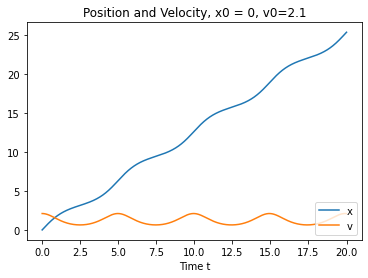

In [108]:
plot (t, x, label="x")
plot (t, v, label="v")
xlabel("Time t")
legend(loc="lower right")
title("Position and Velocity, x0 = 0, v0=2.1")
#savefig("4c_pos_vel.png")

Text(0.5, 1.0, 'Potential, Kinetic, and Total Energies, x0 = 0, v0=2.1')

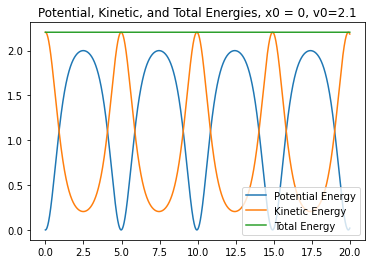

In [109]:
Epot = U(x)
Ekin = 0.5*m*v**2
plot(t, Epot, label="Potential Energy")
plot(t, Ekin, label="Kinetic Energy")
plot(t, Epot+Ekin, label="Total Energy")
legend(loc="lower right")
title("Potential, Kinetic, and Total Energies, x0 = 0, v0=2.1")
#savefig("4c_energy.png")